**Visualize sample swap results.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns

In [2]:
# load data
temp = np.array(listdir('./processed_data/VCF_BAM_comparison/'))
files = temp[np.array([x.startswith('mbv') for x in temp])]
metadata = pd.read_csv('./raw_data/metadata/single_cell_individual_metadata.csv', index_col=0)
qc = pd.read_csv('./raw_data/metadata/WGS_sample_QC_info.csv')

/state/partition1/slurm_tmp/23471918.0.0/ipykernel_57418/256284165.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3,3))


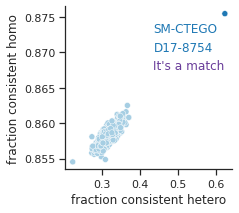

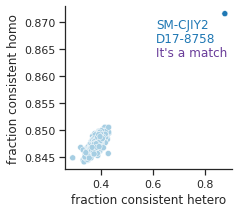

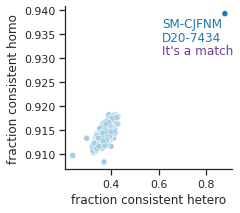

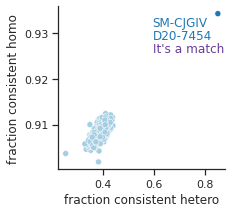

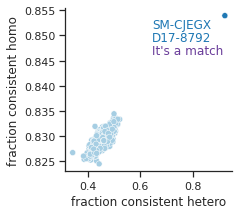

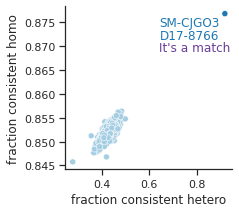

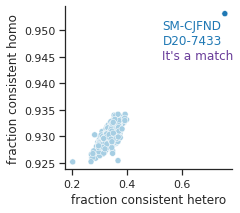

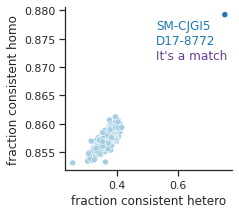

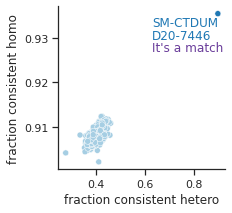

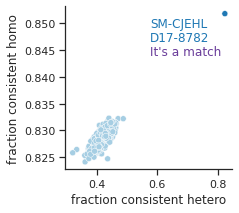

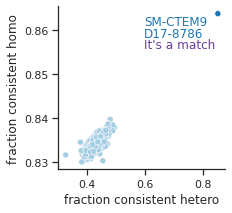

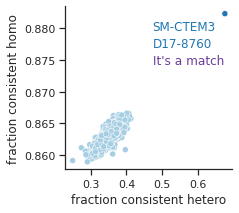

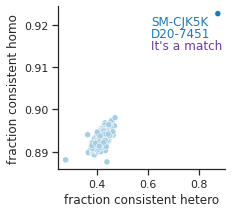

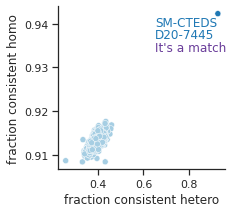

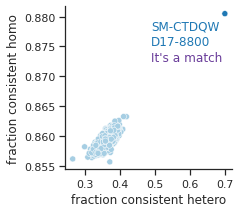

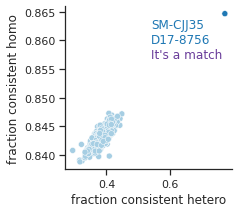

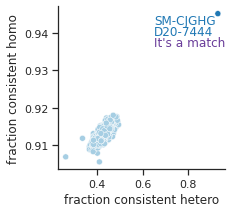

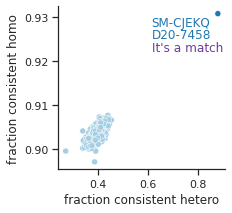

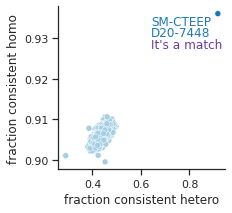

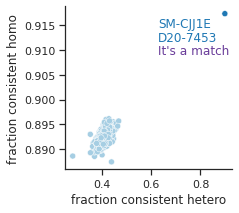

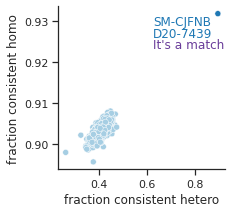

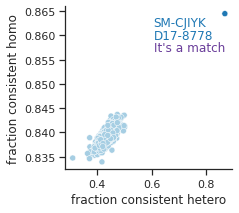

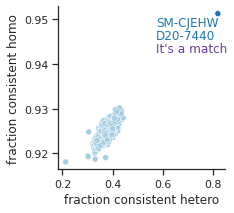

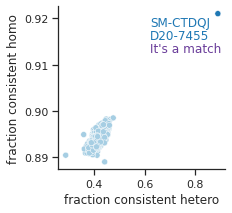

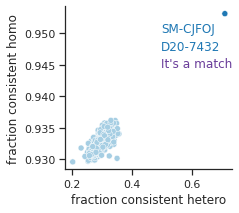

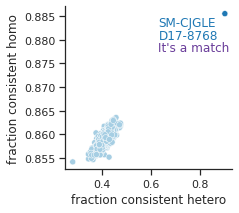

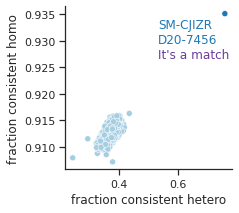

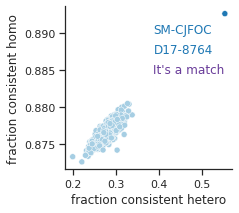

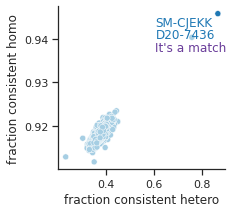

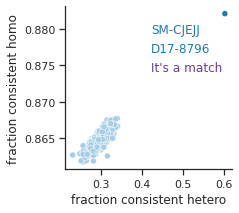

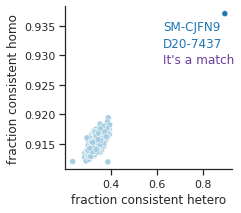

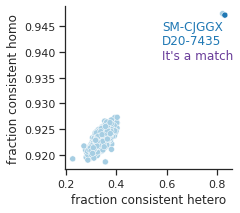

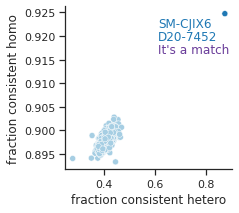

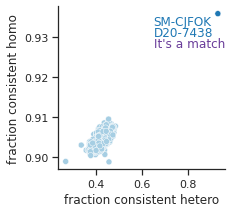

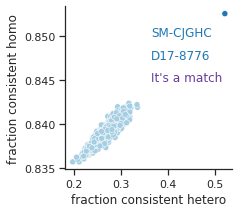

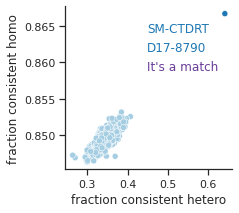

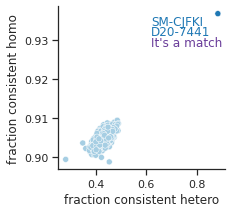

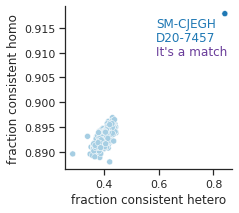

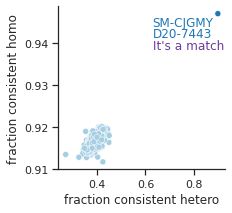

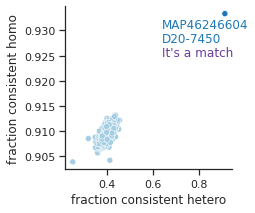

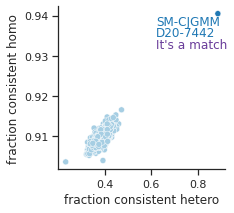

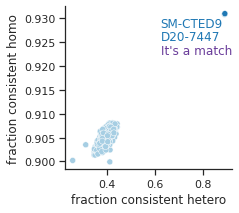

In [3]:
for i in range(len(files)):
    F = files[i]
    data = pd.read_csv('./processed_data/VCF_BAM_comparison/'+F, sep = ' ')
    data['het_fraction_consistent'] = data['n_het_consistent']/data['n_het_covered']
    data['homo_fraction_consistent'] = data['n_hom_consistent']/data['n_hom_covered']
    data['max'] = data['het_fraction_consistent']==np.max(data['het_fraction_consistent'])
    
    plt.figure(figsize=(3,3))

    sns.set(font_scale=1)
    sns.set_palette(sns.color_palette("Paired"))
    sns.set_style("ticks")
    ax = sns.scatterplot(data=data, x='het_fraction_consistent', y='homo_fraction_consistent', hue='max')
    x = data[data['max']]['het_fraction_consistent']
    y = data[data['max']]['homo_fraction_consistent']
    tx = data[data['max']]['SampleID']
    wgsid = np.array(tx)[0]
    plt.text(x-(x*0.3), y-(y*0.003), wgsid, c=sns.color_palette("Paired")[1])
    libid = F.split('_')[-1].split('.')[0]
    plt.text(x-(x*0.3), y-(y*0.006), libid, c=sns.color_palette("Paired")[1])

    projid = np.array(metadata[metadata['sample_id']==libid]['projid'])[0]
    possible_wgsids = set(qc[qc['projid']==projid]['WGS_id'])
    
    if wgsid in possible_wgsids:
        plt.text(x-(x*0.3), y-(y*0.009), "It's a match", c=sns.color_palette("Paired")[9])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend([],[], frameon=False)
    plt.xlabel('fraction consistent hetero')
    plt.ylabel('fraction consistent homo')
    plt.savefig('./pdf_figures/'+libid+'_sample_swap_res.pdf',bbox_inches='tight')